In [ ]:

import numpy as np 
import os
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error

In [ ]:
df= pd.read_csv('/content/INFY_Final_CNN.csv')

In [ ]:
df

,Date,close,compund,neg,neu,pos,open,high,low,volume
0,04-04-2016,621.849976,0.0000,0.000,1.000,0.000,606.775024,624.000000,606.775024,4577054
1,05-04-2016,609.900024,0.3818,0.000,0.843,0.157,621.000000,621.150024,607.000000,4790716
2,07-04-2016,590.750000,0.0000,0.000,1.000,0.000,604.200012,604.200012,587.500000,5657890
3,11-04-2016,591.950012,-0.4767,0.237,0.763,0.000,582.900024,593.375000,575.549988,5768678
4,12-04-2016,591.099976,0.8807,0.000,0.263,0.737,590.250000,597.450012,589.299988,5842138
...,...,...,...,...,...,...,...,...,...,...
1108,23-04-2021,1333.800049,0.0000,0.000,1.000,0.000,1343.000000,1348.400024,1331.000000,7316262
1109,26-04-2021,1343.550049,0.8225,0.000,0.751,0.249,1332.250000,1351.300049,1321.000000,7088606
1110,27-04-2021,1348.500000,0.2960,0.049,0.852,0.099,1346.000000,1353.000000,1340.150024,3636115
1111,28-04-2021,1356.000000,0.2023,0.000,0.964,0.036,1358.000000,1359.500000,1344.599976,4879234


In [ ]:
df = df.drop(columns=['open','high','low','volume','Date'])
df

,close,compund,neg,neu,pos
0,621.849976,0.0000,0.000,1.000,0.000
1,609.900024,0.3818,0.000,0.843,0.157
2,590.750000,0.0000,0.000,1.000,0.000
3,591.950012,-0.4767,0.237,0.763,0.000
4,591.099976,0.8807,0.000,0.263,0.737
...,...,...,...,...,...
1108,1333.800049,0.0000,0.000,1.000,0.000
1109,1343.550049,0.8225,0.000,0.751,0.249
1110,1348.500000,0.2960,0.049,0.852,0.099
1111,1356.000000,0.2023,0.000,0.964,0.036


In [ ]:
df.head(3)

,close,compund,neg,neu,pos
0,621.849976,0.0000,0.0,1.000,0.000
1,609.900024,0.3818,0.0,0.843,0.157
2,590.750000,0.0000,0.0,1.000,0.000


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)  
y_close = df[:,0]


In [ ]:
y_close

array([0.18434804, 0.17244985, 0.15338277, ..., 0.9078508 , 0.91531832,
       0.91566678])

In [ ]:
steps=20

In [ ]:
ntrain = int(len(y_close)*0.8) 
train = df[0:ntrain]
test  = df[ntrain-steps:len(df)]
y_close_train = y_close[0:ntrain]
y_close_test  = y_close[ntrain-steps:len(y_close)]
y_close_test.shape
y_close_test

array([0.20147356, 0.18633938, 0.19121818, 0.21566184, 0.19564892,
       0.20426142, 0.24154923, 0.22034149, 0.22691288, 0.22302981,
       0.27759245, 0.23597351, 0.23597351, 0.2282073 , 0.2272614 ,
       0.23647134, 0.24513367, 0.2498631 , 0.22049087, 0.22621596,
       0.23089556, 0.23184146, 0.23448   , 0.25454269, 0.24279381,
       0.26758599, 0.26952756, 0.25319856, 0.26171152, 0.27022448,
       0.26370286, 0.26987602, 0.2656942 , 0.28291925, 0.27968333,
       0.27794091, 0.26609249, 0.25424401, 0.2497635 , 0.2633544 ,
       0.2657938 , 0.2759994 , 0.26768553, 0.28272017, 0.27624832,
       0.26265742, 0.31015083, 0.29377207, 0.29795389, 0.35590183,
       0.33653606, 0.34350574, 0.34365505, 0.35878923, 0.34504901,
       0.39254243, 0.4722457 , 0.46442973, 0.49544477, 0.49788417,
       0.47911584, 0.46920892, 0.48404435, 0.50953351, 0.52387111,
       0.51520883, 0.5224772 , 0.52700749, 0.51794692, 0.51092741,
       0.50579975, 0.53183646, 0.51197291, 0.51242091, 0.51600

In [ ]:
import numpy as np

def to_sequences(seq_size, data, close):
    x = []
    y = []
    
    for i in range(len(data)-seq_size-1):
        window = data[i:(i+seq_size)]
        after_window = close[i+seq_size]
        window = [[x] for x in window]
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)


timesteps = steps

x_train, y_train = to_sequences(timesteps, train, y_close_train)
x_test, y_test   = to_sequences(timesteps, test, y_close_test)

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (869, 20, 1, 5)
Shape of x_test: (222, 20, 1, 5)
Shape of y_train: (869,)
Shape of y_test: (222,)


In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[2], x_train.shape[1],x_train.shape[3]))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[2],x_test.shape[1],x_test.shape[3]))
x_train

array([[[[0.18434804, 0.49562358, 0.        , 1.        , 0.        ],
         [0.17244985, 0.68879332, 0.        , 0.78697422, 0.21302578],
         [0.15338277, 0.49562358, 0.        , 1.        , 0.        ],
         ...,
         [0.15338277, 0.49562358, 0.        , 1.        , 0.        ],
         [0.16211978, 0.66764483, 0.13492063, 0.68113976, 0.20352782],
         [0.16896501, 0.9284594 , 0.        , 0.65943012, 0.34056988]]],


       [[[0.17244985, 0.68879332, 0.        , 0.78697422, 0.21302578],
         [0.15338277, 0.49562358, 0.        , 1.        , 0.        ],
         [0.15457758, 0.25443967, 0.37619048, 0.67842605, 0.        ],
         ...,
         [0.16211978, 0.66764483, 0.13492063, 0.68113976, 0.20352782],
         [0.16896501, 0.9284594 , 0.        , 0.65943012, 0.34056988],
         [0.16351369, 0.49562358, 0.        , 1.        , 0.        ]]],


       [[[0.15338277, 0.49562358, 0.        , 1.        , 0.        ],
         [0.15457758, 0.25443967, 0.37619

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.optimizers import Adam
from keras.layers import Conv1D, Conv2D, MaxPooling2D
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler
import csv
import collections
from scipy.stats import zscore
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(64, kernel_size = (1, 2), strides = (1, 2),  padding = 'valid', 
               activation = 'relu', input_shape = (1,steps,5)))
cnn.add(MaxPooling2D(pool_size = (1,2)))
cnn.add(Flatten())
cnn.add(Dense(32, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(1, activation="relu"))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 10, 64)         704       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                10272     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 11,009
Trainable params: 11,009
Non-trainable params: 0
__________________________________________________

In [ ]:
cnn.compile(loss='mean_squared_error', optimizer='nadam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1, patience=2, verbose=2, mode='auto') 
checkpointer = ModelCheckpoint(filepath="CNN_Parameters.hdf5", verbose=0, save_best_only=True)

In [ ]:
history = cnn.fit(x_train,y_train,validation_split=0.2,batch_size = 64, callbacks=[checkpointer],verbose=1,epochs = 30)

Epoch 1/30
11/11 [==============================] - 9s 52ms/step - loss: 0.0236 - val_loss: 0.0269
Epoch 2/30
11/11 [==============================] - 0s 4ms/step - loss: 0.0110 - val_loss: 0.0113
Epoch 3/30
11/11 [==============================] - 0s 5ms/step - loss: 0.0082 - val_loss: 0.0046
Epoch 4/30
11/11 [==============================] - 0s 5ms/step - loss: 0.0067 - val_loss: 0.0037
Epoch 5/30
11/11 [==============================] - 0s 5ms/step - loss: 0.0055 - val_loss: 0.0034
Epoch 6/30
11/11 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0025
Epoch 7/30
11/11 [==============================] - 0s 5ms/step - loss: 0.0040 - val_loss: 0.0029
Epoch 8/30
11/11 [==============================] - 0s 6ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 9/30
11/11 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 10/30
11/11 [==============================] - 0s 5ms/step - loss: 0.0032 - val_loss: 0.0040
Epoch 11/30
11/11 

In [ ]:
cnn.load_weights('CNN_Parameters.hdf5')
pred = cnn.predict(x_test)
print(pred.shape)
x_test

(222, 1)


array([[[[0.20147356, 0.8715406 , 0.        , 0.81818182, 0.18181818],
         [0.18633938, 0.70887933, 0.        , 0.93351425, 0.06648575],
         [0.19121818, 0.49562358, 0.        , 1.        , 0.        ],
         ...,
         [0.2498631 , 0.90027827, 0.17142857, 0.59972863, 0.25373134],
         [0.22049087, 0.14318239, 0.13968254, 0.79511533, 0.08548168],
         [0.22621596, 0.91859347, 0.15238095, 0.59565807, 0.27408412]]],


       [[[0.18633938, 0.70887933, 0.        , 0.93351425, 0.06648575],
         [0.19121818, 0.49562358, 0.        , 1.        , 0.        ],
         [0.21566184, 0.94510498, 0.07460317, 0.75712347, 0.18046133],
         ...,
         [0.22049087, 0.14318239, 0.13968254, 0.79511533, 0.08548168],
         [0.22621596, 0.91859347, 0.15238095, 0.59565807, 0.27408412],
         [0.23089556, 0.77763724, 0.        , 0.59972863, 0.40027137]]],


       [[[0.19121818, 0.49562358, 0.        , 1.        , 0.        ],
         [0.21566184, 0.94510498, 0.07460

In [ ]:
pred_temp = np.zeros(shape=(len(pred), 5) )
# put the predicted values in the right field
pred_temp[:,0] = pred[:,0]
# inverse transform and then select the right field

pred_temp=scaler.inverse_transform(pred_temp)[:,0]
pred_temp

array([ 645.11079695,  676.21675202,  670.45167624,  680.23586643,
        680.0551971 ,  685.98271364,  665.00369968,  703.35878721,
        699.74695703,  704.36617738,  701.32374294,  688.94974946,
        691.35134056,  700.40671737,  718.17663572,  710.92310326,
        730.03232732,  708.7711148 ,  724.89899556,  701.23415657,
        704.94524115,  724.76756431,  725.81838576,  705.05595948,
        695.61577735,  696.95571163,  713.86595405,  686.69219097,
        712.98831895,  716.18433429,  709.02652425,  701.55068709,
        704.79947249,  699.5925081 ,  731.05860455,  745.49119876,
        730.36837347,  756.05394926,  772.70438223,  785.15601923,
        781.05303545,  790.85584332,  809.38747028,  804.32453851,
        829.58133891,  851.11642889,  869.39261647,  870.80088543,
        868.78829013,  891.56202463,  903.179368  ,  900.20960837,
        896.29938644,  902.88154496,  912.85230108,  920.47704976,
        919.82357513,  928.42997248,  937.2769929 ,  943.76076

In [ ]:
y_test_temp = np.zeros(shape=(len(y_test), 5) )
# put the predicted values in the right field
y_test_temp[:,0] = y_test
# inverse transform and then select the right field

y_test_temp=scaler.inverse_transform(y_test_temp)[:,0]


In [ ]:
y_test_temp

array([ 668.599976,  669.549988,  672.200012,  692.349976,  680.549988,
        705.450012,  707.400024,  691.      ,  699.549988,  708.099976,
        701.549988,  707.75    ,  703.549988,  720.849976,  717.599976,
        715.849976,  703.950012,  692.049988,  687.549988,  701.200012,
        703.650024,  713.900024,  705.549988,  720.650024,  714.150024,
        700.5     ,  748.200012,  731.75    ,  735.950012,  794.150024,
        774.700012,  781.700012,  781.849976,  797.049988,  783.25    ,
        830.950012,  911.      ,  903.150024,  934.299988,  936.75    ,
        917.900024,  907.950012,  922.849976,  948.450012,  962.849976,
        954.150024,  961.450012,  966.      ,  956.900024,  949.849976,
        944.700012,  970.849976,  950.900024,  951.349976,  954.950012,
        951.200012,  953.599976,  957.5     ,  967.549988,  959.299988,
        955.150024,  948.799988,  947.400024,  938.099976,  950.799988,
        947.049988,  935.25    ,  928.599976,  914.150024,  924.

In [ ]:
final_mape=mean_absolute_error(y_test_temp, pred_temp)
print("Mean Absolute Error",final_mape)
final_mse=mean_squared_error(y_test_temp,pred_temp)
print("Mean Squared Error: ",final_mse)
final_rmse=np.sqrt(final_mse)
print("Root Mean Squared Error: ",final_rmse)
final_mse_1=mean_squared_error(y_test,pred)
print("Mean Squared Error: ",final_mse_1)
final_rmse_1=np.sqrt(final_mse_1)
print("Root Mean Squared Error: ",final_rmse_1)

Mean Absolute Error 85.69298286778141
Mean Squared Error:  11274.734708620797
Root Mean Squared Error:  106.18255369231237
Mean Squared Error:  0.011177280039479078
Root Mean Squared Error:  0.10572265622599102


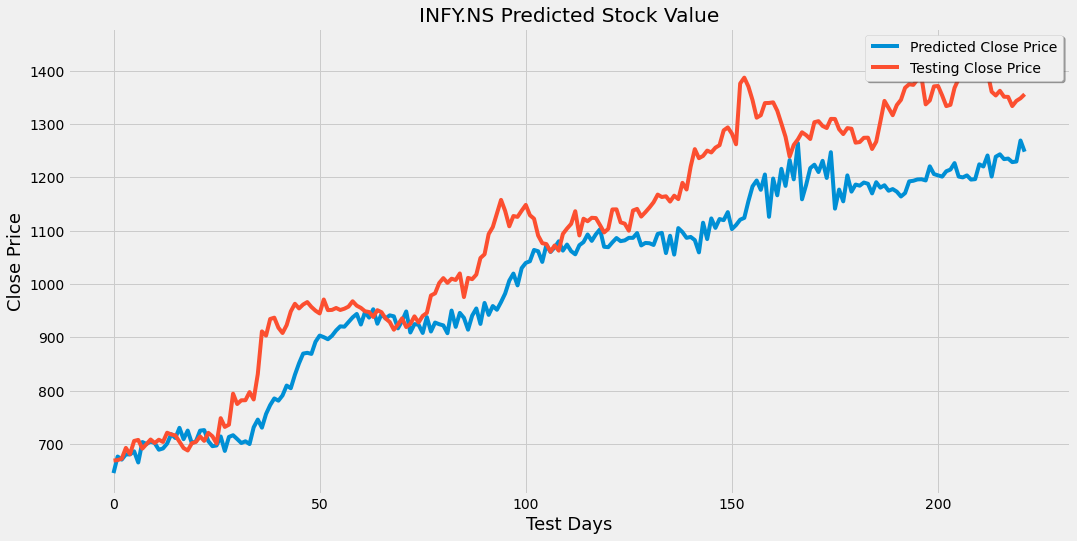

In [ ]:
plt.figure(figsize=(16,8))
plt.title('INFY.NS Predicted Stock Value')
plt.plot(pred_temp, label="Predicted Close Price")
plt.plot(y_test_temp, label="Testing Close Price")
plt.xlabel('Test Days',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.legend(loc='upper right', fancybox=True, shadow=True)
plt.show()

In [ ]:
prediction = np.array(pred_temp)
prediction = pd.DataFrame(pred_temp)
prediction.to_csv('CNNSENT.csv')